##### ПИ18-1 Гриднев Д.В.

In [303]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns


In [304]:
col_names = ['pregnant', 'glucose', 'bp', 'skin',
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)[1:]

In [305]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [306]:
Y = pima.label
X = pima.drop(['label'], axis=1)


In [307]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                   random_state=True)

In [308]:
cls = LogisticRegression()

In [309]:
cls.fit(x_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [310]:
y_pred = cls.predict(x_test)


In [311]:
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

Text(0.5, 10.5, 'Предсказанные значения')

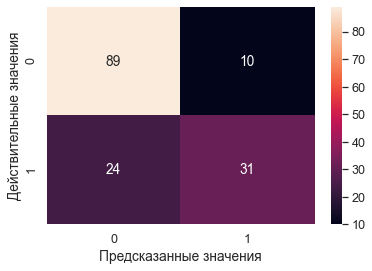

In [312]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

#### Точность

In [313]:
cls.score(x_test, y_test) * 100

77.92207792207793

## Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.

In [314]:
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

#### Точность

In [315]:
accuracy_score(y_test, y_pred) * 100


78.57142857142857

## Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.

SVC в данном случае лучше чем LogisticRegression, но не сильно


# Постройте модели классификации на основе следующих методов:

## Логистическая регрессия (LogisticRegression)
Уже было

## Метод опорных векторов с линейным ядром (SVC);

In [316]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

y_predicted = clf.predict(x_test)

accuracy_score(y_test, y_predicted) * 100


77.92207792207793

## Метод опорных векторов с гауссовым ядром (SVC);

In [317]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

y_predicted = clf.predict(x_test)

accuracy_score(y_test, y_predicted) * 100

78.57142857142857

## Метод k ближайших соседей (KNeighborsClassifier);

In [318]:
params_grid={
    "n_neighbors": np.arange(200),
    "metric": ["minkowski", "euclidean", "chebyshev", "manhattan"]
}

grid = GridSearchCV(KNeighborsClassifier(), params_grid, cv=5, n_jobs=-1, verbose=1)

In [319]:
grid.fit(x_train, y_train)

y_predicted = grid.predict(x_test)

accuracy_score(y_test, y_predicted) * 100

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 3930 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:    7.7s finished


80.51948051948052

Пока лучшая точность, но опять на уровне выбора данных, если скормить чуть другое, может результат поменяться


## Многослойный перцептрон (MLP);

In [320]:
mlp = MLPClassifier()
scaler = StandardScaler()

pipe = Pipeline([('scaler', scaler), ('mlp', mlp)])

cv_scores = cross_val_score(pipe,
                            x_train, y_train,
                            scoring = 'accuracy', cv = 10, n_jobs = -1)

cv_scores.mean()

0.7425965097831835

## Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;

Для данного набора данных эффективнее всего сработал KNeighborsClassifier
Но, я не занимался оптимизацией данных, не подгонял параметры(в KNeighborsClassifier как раз использовал gridcv)

## Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [321]:
iris = load_iris()

In [322]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [323]:
X = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 4)

In [324]:
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])

In [325]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Для классификации по параметрам используем KNeighborsClassifier
Для лучшего результат попытаемся подобрать лучшие параметры

In [326]:
params_grid={
    "n_neighbors": np.arange(200),
    "metric": ["minkowski", "euclidean", "chebyshev", "manhattan"]
}

grid = GridSearchCV(KNeighborsClassifier(), params_grid, cv=5, n_jobs=-1, verbose=1)


In [327]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [328]:
accuracy_score(y_test, y_pred) * 100

98.33333333333333